In [2]:
# Importe as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io

# Carregue a imagem do astronauta
astronaut = data.astronaut()

# Percentuais de RGB para a conversão em escala de cinza
percent_r = 0.30
percent_g = 0.59
percent_b = 0.11

# Conversão
astro_cinza = (percent_r * astronaut[:, :, 0] +
                           percent_g * astronaut[:, :, 1] +
                           percent_b * astronaut[:, :, 2])



In [3]:
import numpy as np

dim = np.max(astro_cinza) # Verifica o limite máximo de intensidade no bit de intensidade

def atualizar_matriz(newdim, matriz):
    jane=(dim+1)/newdim # Analisa em quantas partições será necessário dividir de acordo com a resolução solicitada.
    newvetor = np.array(list(range(1, newdim +1))) # Cria uma vetor base para a criação da nova imagem
    limitador=(jane*newvetor)-1 # Cria o vetor referência para a quantização
    # Verifica a forma da matriz
    n_linhas, n_colunas = matriz.shape

    # Cria uma nova matriz para armazenar a imagem quantizada.
    nova_matriz = np.zeros_like(matriz)

    for i in range(n_linhas):
      for j in range(n_colunas):
        elemento = matriz[i, j]
        n = 0

        while n < newdim-1 :

            # Verifica se o elemento está entre os limites
            if limitador[n] < elemento <= limitador[n + 1]:
                # Se está dentro dos limites, atribui o valor de newvetor[n-2]
                nova_matriz[i, j] = newvetor[n]

            n = n + 1

    return nova_matriz




In [5]:
# Atualiza a matriz
Quantiz_4 = atualizar_matriz(4, astro_cinza)
Quantiz_8 = atualizar_matriz(8, astro_cinza)
Quantiz_32 = atualizar_matriz(32, astro_cinza)
Quantiz_64 = atualizar_matriz(64, astro_cinza)


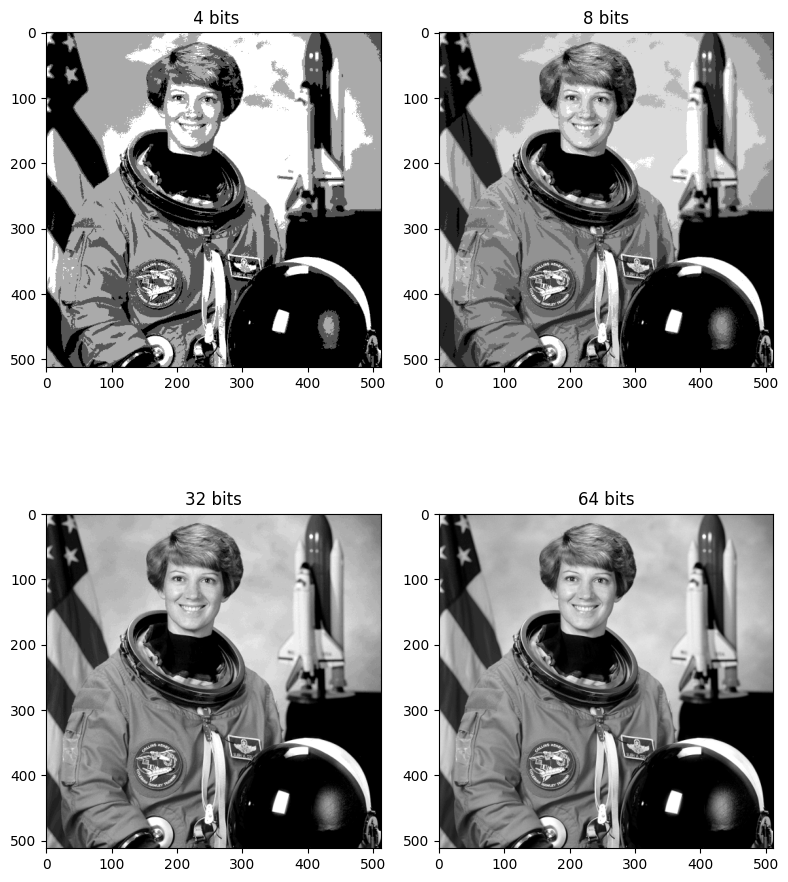

In [6]:
import matplotlib.pyplot as plt

# Plotagem
imagens = [Quantiz_4, Quantiz_8, Quantiz_32, Quantiz_64]
nomes = [" 4 bits", "8 bits", "32 bits", "64 bits"]

# Cria um subplot de 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

# Itera sobre as imagens e seus respectivos nomes para plotar
for i in range(2):
    for j in range(2):
        index = i * 2 + j  # Índice da imagem atual
        axs[i, j].imshow(imagens[index], cmap='gray')
        #axs[i, j].axis('off')  # Esconde os eixos
        axs[i, j].set_title(nomes[index])  # Define o título como o nome da imagem

plt.tight_layout()
plt.show()